In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [105]:
df1 = pd.read_csv("Resources/MD_Homeless_PerCounty.csv")
df2 = pd.read_csv("Resources/MD_County_homeless.csv")
df3 = pd.merge(df1, df2, how="left", on=["County_ID","County_ID"])
df3.head()

,County_ID,Overall Homeless 2019,Overall Homeless 2018,Overall Homeless 2017,Overall Homeless 2016,Overall Homeless 2015,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,...,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total
0,MD-500,145,79,118,124,96,27,9,109,98,...,0,0,12,Allegany County,32253,30618,1635,5,48170,56
1,MD-501,2294,2508,2669,2725,2796,236,134,1924,631,...,25,8,35,Baltimore city,287760,273351,14409,5,49780,58
2,MD-502,228,190,189,179,210,86,16,126,100,...,2,0,26,Harford County,143572,138927,4645,3,91492,106
3,MD-503,302,366,376,390,335,49,23,230,112,...,1,0,18,Anne Arundel County,321069,311556,9513,3,100916,117
4,MD-504,201,168,168,214,166,68,14,119,93,...,5,1,16,Howard County,191529,186427,5102,3,121329,140


In [106]:
df3.columns

Index(['County_ID', 'Overall Homeless 2019', 'Overall Homeless 2018',
       'Overall Homeless 2017', 'Overall Homeless 2016',
       'Overall Homeless 2015', 'Overall Homeless - Under 18',
       'Overall Homeless - Age 18 to 24', 'Overall Homeless - Over 24',
       'Overall Homeless - Female', 'Overall Homeless - Male',
       'Overall Homeless - Non-Hispanic', 'Overall Homeless - Hispanic/Latino',
       'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races', 'County_name',
       'Civilian_labor_force', 'Employed', 'Unemployed', 'Unemployment_rate',
       'Median_Household_Income', 'Med_HH_Income_Percent_of_State_Total'],
      dtype='object')

In [107]:
age_df = df3[["County_name","Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]]

In [108]:
age_df.head()

,County_name,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24
0,Allegany County,27,9,109
1,Baltimore city,236,134,1924
2,Harford County,86,16,126
3,Anne Arundel County,49,23,230
4,Howard County,68,14,119


In [109]:
# Set the 'Country Code' to be our index for easy referencing of rows
age_df = age_df.set_index("County_name")

In [110]:
age_df.columns

Index(['Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24'],
      dtype='object')

In [111]:
# Collect the mean unemployment rates for the world
average_age = age_df.mean()

In [112]:
age_df

,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24
County_name,,,
Allegany County,27,9,109
Baltimore city,236,134,1924
Harford County,86,16,126
Anne Arundel County,49,23,230
Howard County,68,14,119
Baltimore County,188,33,514
Carroll County,22,17,105
Cecil County,28,3,95
"Charles, Calvert, St.Mary Counties",51,21,234


In [113]:
ages = age_df.keys()

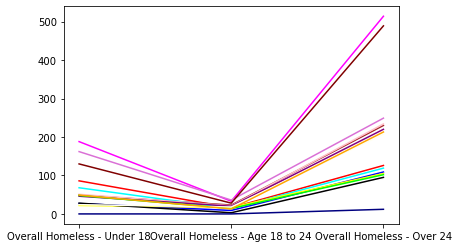

In [145]:
# Plot the unemployment values for a single country
county1, = plt.plot(ages, age_df.loc['Allegany County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="blue",label=age_df.loc['Allegany County'])

county3, = plt.plot(ages, age_df.loc['Harford County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="red",label=age_df.loc['Harford County'])

county4, = plt.plot(ages, age_df.loc['Anne Arundel County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="brown",label=age_df.loc['Anne Arundel County'])

county5, = plt.plot(ages, age_df.loc['Howard County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="cyan",label=age_df.loc['Howard County'])

county6, = plt.plot(ages, age_df.loc['Baltimore County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="magenta",label=age_df.loc['Baltimore County'])

county7, = plt.plot(ages, age_df.loc['Carroll County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="yellow",label=age_df.loc['Carroll County'])

county8, = plt.plot(ages, age_df.loc['Cecil County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="black",label=age_df.loc['Cecil County'])

county9, = plt.plot(ages, age_df.loc['Charles, Calvert, St.Mary Counties',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="pink",label=age_df.loc['Charles, Calvert, St.Mary Counties'])

county10, = plt.plot(ages, age_df.loc['Frederick County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="purple",label=age_df.loc['Frederick County'])

county11, = plt.plot(ages, age_df.loc['Garrett County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="navy",label=age_df.loc['Garrett County'])

county12, = plt.plot(ages, age_df.loc['Mid-Shore Regional Counties',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="lime",label=age_df.loc['Mid-Shore Regional Counties'])

county13, = plt.plot(ages, age_df.loc['Washington County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="ivory",label=age_df.loc['Washington County'])

county14, = plt.plot(ages, age_df.loc['Wicomico, Somerset, Worcester Counties',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="orange",label=age_df.loc['Wicomico, Somerset, Worcester Counties'])

county15, = plt.plot(ages, age_df.loc['Prince Georges County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="orchid",label=age_df.loc['Prince Georges County'])

county16, = plt.plot(ages, age_df.loc['Montgomery County',["Overall Homeless - Under 18","Overall Homeless - Age 18 to 24","Overall Homeless - Over 24"]], 
                        color="maroon",label=age_df.loc['Montgomery County'])

plt.savefig('images/Homeless_By_Age')
plt.show()
